In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load cleaned dataset
df = pd.read_csv("cleaned_store_sales.csv")
print(df.head())

# Check for missing values:
print(df.isnull().sum())
#Confirm data types:
print(df.dtypes)

# Define features (X) and target (y)
X = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Customer_Density']]
y = df['Store_Sales']

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)


# Initialize and train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"MAE: ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"R²: {r2:.3f}\n")

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1        1659             1961                   530        66490   
1          2        1461             1752                   210        39820   
2          3        1340             1609                   720        54010   
3          4        1451             1748                   620        53730   
4          5        1770             2111                   450        46620   

   Sales_per_SqFt  Customer_Density  High_Sales_Flag  
0       40.078360          0.319470                0  
1       27.255305          0.143737                0  
2       40.305970          0.537313                0  
3       37.029635          0.427292                0  
4       26.338983          0.254237                0  
Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
Sales_per_SqFt          0
Customer_Density        0
High_Sa

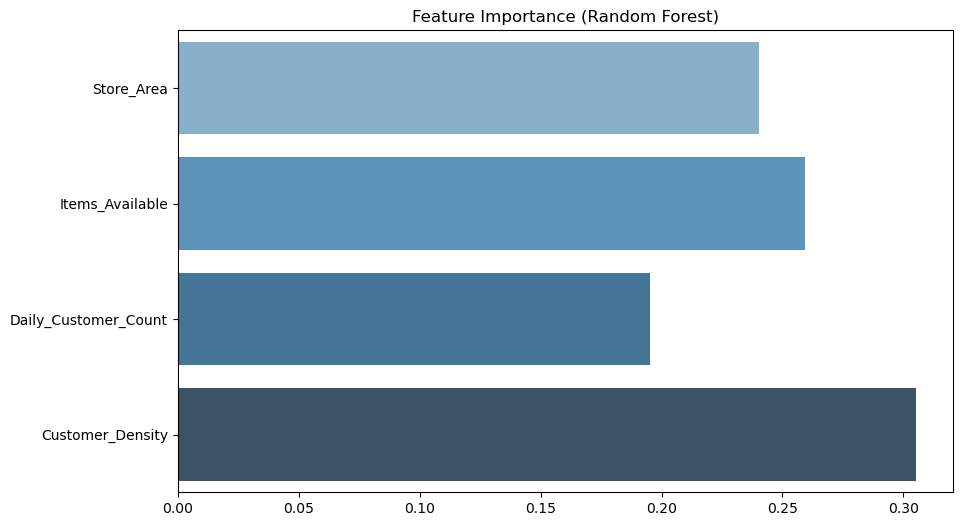

In [3]:
# Plot feature importance for Random Forest
features = X.columns
importances = rf.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="Blues_d")
plt.title("Feature Importance (Random Forest)")
plt.show()